In [17]:
#!pip install -q requests pandas matplotlib configparser

In [18]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import configparser

In [19]:
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [20]:
#07/07/2025
meu_saldo_bat = 0.0563

In [21]:
url_preco = 'https://api.coingecko.com/api/v3/simple/price?ids=basic-attention-token&vs_currencies=brl'
res = requests.get(url_preco)
preco_bat = res.json()['basic-attention-token']['brl']

In [22]:
valor_em_reais = meu_saldo_bat * preco_bat

In [23]:
print(f"Preço atual do BAT: R$ {preco_bat:.2f}")
print(f"Seu saldo: {meu_saldo_bat} BAT ≈ R$ {valor_em_reais:.4f}")

Preço atual do BAT: R$ 0.69
Seu saldo: 0.0563 BAT ≈ R$ 0.0389


In [24]:
url_historico = 'https://api.coingecko.com/api/v3/coins/basic-attention-token/market_chart?vs_currency=brl&days=30'
res = requests.get(url_historico)
dados = res.json()

In [25]:
precos = pd.DataFrame(dados['prices'], columns=['timestamp', 'price'])
precos['timestamp'] = pd.to_datetime(precos['timestamp'], unit='ms')
precos.set_index('timestamp', inplace=True)

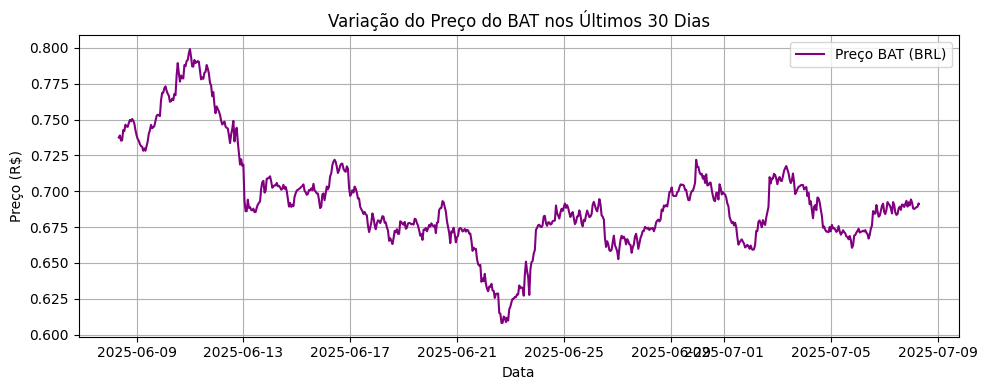

In [26]:
plt.figure(figsize=(10, 4))
plt.plot(precos.index, precos['price'], label='Preço BAT (BRL)', color='purple')
plt.title('Variação do Preço do BAT nos Últimos 30 Dias')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig('preco_bat_30dias.png')

plt.show()

In [27]:

if os.getenv('GITHUB_ACTIONS'):
    token = os.getenv('API_TOKEN')
    chat_id = os.getenv('CHAT_ID')
else:
    token = config['telegram']['token']
    chat_id = config['telegram']['chat_id']

def enviar_alerta(mensagem):

    url = f"https://api.telegram.org/bot{token}/sendMessage"
    payload = {'chat_id': chat_id, 'text': mensagem}
    response = requests.post(url, data=payload)

    if response.status_code == 200:
        print("Alerta enviado com sucesso!")
    else:
        print("Erro ao enviar:", response.text)

In [28]:
mensagem_alerta = f"Preço atual do BAT: R$ {preco_bat:.2f}\nSeu saldo: {meu_saldo_bat} BAT ≈ R$ {valor_em_reais:.4f}"

enviar_alerta(mensagem_alerta)

Alerta enviado com sucesso!


In [29]:
def enviar_foto_telegram(caminho_foto, legenda=""):

    url = f"https://api.telegram.org/bot{token}/sendPhoto"
    files = {'photo': open(caminho_foto, 'rb')}
    payload = {'chat_id': chat_id, 'caption': legenda}

    response = requests.post(url, data=payload, files=files)

    if response.status_code == 200:
        print("Foto enviada com sucesso!")
    else:
        print("Erro ao enviar foto:", response.text)

In [30]:
import os

caminho_arquivo = 'preco_bat_30dias.png'
enviar_foto_telegram(caminho_arquivo, legenda="Gráfico de preço do BAT nos últimos 30 dias")

if os.path.exists(caminho_arquivo):
    os.remove(caminho_arquivo)
    print(f"Arquivo '{caminho_arquivo}' excluído com sucesso.")
else:
    print(f"Arquivo '{caminho_arquivo}' não encontrado para exclusão.")

Foto enviada com sucesso!
Arquivo 'preco_bat_30dias.png' excluído com sucesso.
